# Titanic Project

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Importing the Dataset

In [3]:
df= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Checking null values in the dataframe

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

since, there is null values present in Age, Cabin and Embarked.

# Checking the heatmap of nullvalues

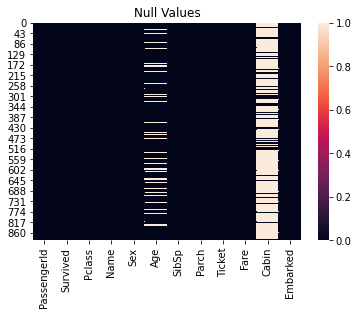

In [8]:
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

It is clearly seen form heatmap, that null values present in cabin and sex column

We cannot leave the cells empty, thus have to fill the tables with the most suitable values.

# Droping columns

Dropping  the “Cabin”, "Name", "PassangerId" and "Ticket" column from the data frame as it won’t be of much importance

In [9]:
df = df.drop(columns='Cabin', axis=1)

In [10]:
df = df.drop(columns='Name', axis=1)

In [11]:
df = df.drop(columns='PassengerId', axis=1)

In [12]:
df = df.drop(columns='Ticket', axis=1)

In [13]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


now the dataset is short and clear.

# Replacing the values

In [14]:
# Replacing the missing values in the “Age” column with the mean value
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [15]:
# Finding the mode value of the “Embarked” column as it will have occurred the maximum number of times
print(df['Embarked'].mode())

0    S
dtype: object


In [16]:
# Replacing the missing values in the “Embarked” column with mode value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [17]:
# check if there are still any null values present in data set
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

there is no null values present in dataset, because we removed the "cabin" column.

# checking datatype

In [18]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

# converting 'Sex' & 'Embarked' column into integer type values, and transform it into a categorical column:

In [19]:
df.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)


In [20]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


now all the values of Sex and Embarked column is successfully replaced by integers.

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
Y = df['Survived']
X = df.drop("Survived", axis=1)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=2)

# Calculating accuracy using Logistic regression

In [23]:
model = LogisticRegression()
model.fit(X_train, Y_train)
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.8075842696629213


# Checking for random people weather it is survived or not

In [24]:
input_data = (3,90,155,69,88,172,100)  # Note that these datas exclude the Survived data, as it is to be determined from the model itself

In [25]:
input_data_as_numpy_array = np.asarray(input_data)

In [26]:
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [27]:
prediction = model.predict(input_data_reshaped)
#print(prediction)
if prediction[0]==0:
    print("Dead")
if prediction[0]==1:
    print("Alive")

Alive
